# Parameter estimation by optimization

A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. 

## Optimal parameters

The set of parameters that brings the model in closest agreement with the data uses the mean and standart deviation computed directly from the data. These are the optimal parameters. 

Parameters are only optimal for the model you choose for your data. When the model is wrong the optimal parameters are not really meaningful.

Finding the optimal parameters is not always as easy as just computing the mean and standard deviation of the data. 


### How often do we get no-hitters?

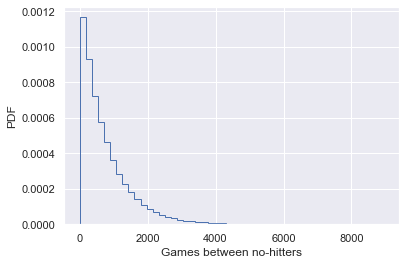

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
file_nohitter = open("nohitter_times.dat", "rb")
nohitter_times = pickle.load(file_nohitter)
nohitter_times = nohitter_times.astype("int")
file_nohitter.close()

np.random.seed(42)
tau = np.mean(nohitter_times)
inter_nohitter_time = np.random.exponential(tau, 100000)
_ = plt.hist(inter_nohitter_time, bins=50, density=True, histtype="step")
_ = plt.xlabel("Games between no-hitters")
_ = plt.ylabel("PDF")
plt.show()

### Do the data follow our story?

Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

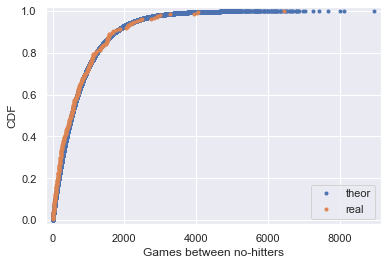

In [14]:
import seaborn as sns
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
sns.set()
x,y = ecdf(nohitter_times)
x_theor, y_theor = ecdf(inter_nohitter_time)
plt.plot(x_theor, y_theor, marker=".", linestyle="none", label="theor")
plt.plot(x, y, marker=".", linestyle="none", label="real")
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')
plt.legend(loc="lower right")
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

### How is this parameter optimal?


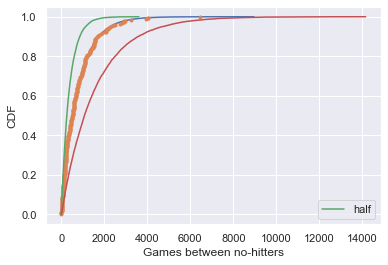

In [16]:
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

samples_half = np.random.exponential(tau/2, 10000)
samples_double = np.random.exponential(tau*2, 10000)
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)
plt.plot(x_half, y_half, label="half")
plt.plot(x_double, y_double)
plt.legend()
plt.show()

The value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

## Linear regression by least squares

Often time a linear function is appropriate to describe the data. Parameters of the function is the slope and intercept.
The vertical distance between the data point and the line is called the residual. So the line is defined to be closest to the data to be the line which the sum of the squares of all residuals is minimum. Finding this is called "least squares".

### EDA of literacy/fertility data


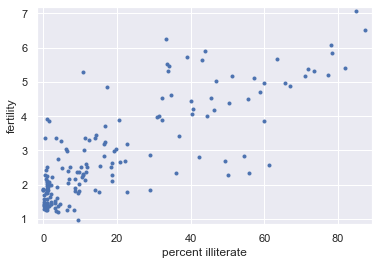

0.8041324026815344


In [17]:
from urllib.request import urlretrieve 
import pandas as pd
url ="https://assets.datacamp.com/production/repositories/470/datasets/f1e7f8a98c18da5c60b625cb8af04c3217f4a5c3/female_literacy_fertility.csv"
urlretrieve(url, "illiteracy.csv")
literacy_fertility = pd.read_csv("illiteracy.csv")
literacy_fertility["illiteracy"] = 100 - literacy_fertility["female literacy"]
_ = plt.plot("illiteracy", "fertility", data=literacy_fertility, marker=".", linestyle="none")
plt.margins(0.02)
_ = plt.xlabel("percent illiterate")
_ = plt.ylabel("fertility")
plt.show()

def pearson_r(x, y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]
print(pearson_r(literacy_fertility["illiteracy"], literacy_fertility["fertility"]))

### Linear regression

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


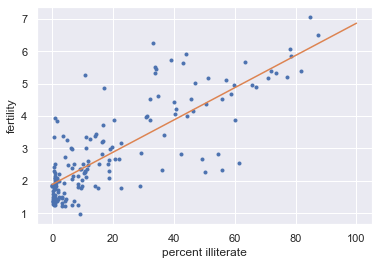

In [18]:
illiteracy = literacy_fertility["illiteracy"]
fertility = literacy_fertility["fertility"]
plt.plot(illiteracy, fertility, marker=".", linestyle="none")
_ = plt.xlabel("percent illiterate")
_ = plt.ylabel("fertility")

a, b = np.polyfit(illiteracy, fertility, 1)
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')
x = np.array([0,100])
y = x * a + b
_=plt.plot(x,y)
plt.show()

In [88]:
from scipy.stats import linregress
reg =linregress(illiteracy, fertility)
reg

LinregressResult(slope=0.0497985480906342, intercept=1.8880506106365569, rvalue=0.8041324026815342, pvalue=5.635092985977159e-38, stderr=0.002910346030927815)

### How is it optimal?

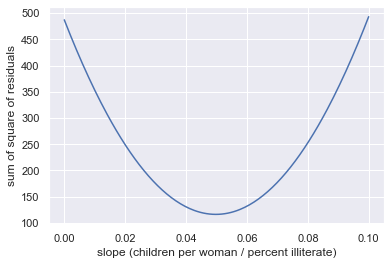

In [19]:
a_vals = np.linspace(0, 0.1, 200)
rss = np.empty_like(a_vals)
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)
plt.plot(a_vals, rss, "-")
plt.xlabel("slope (children per woman / percent illiterate)")
plt.ylabel("sum of square of residuals")
plt.show()

The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares).

The minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals

## The importance of EDA: Anscombe's quartet

### Linear regression on appropriate Anscombe data

0.5000909090909095 3.0000909090909076


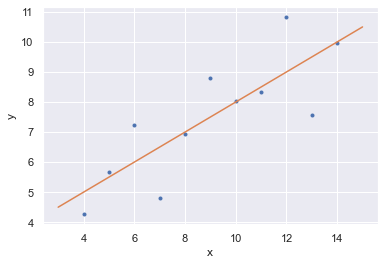

In [20]:
x = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82,  5.68])
a, b = np.polyfit(x, y, 1)
print(a,b)
x_theor = np.array([3, 15])
y_theor = x_theor * a + b
plt.plot(x, y, marker=".", linestyle="none")
plt.plot(x_theor, y_theor)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Linear regression on all Anscombe data


slope: 0.5000909090909095 intercept: 3.0000909090909076


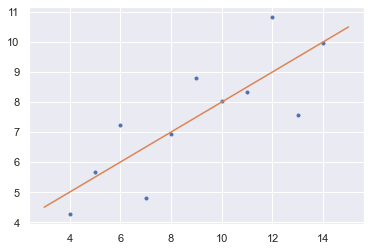

slope: 0.5000000000000004 intercept: 3.000909090909089


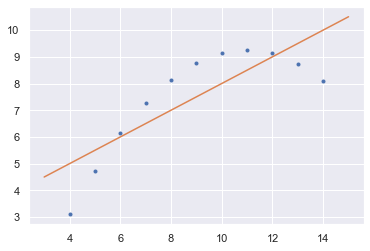

slope: 0.4997272727272731 intercept: 3.0024545454545453


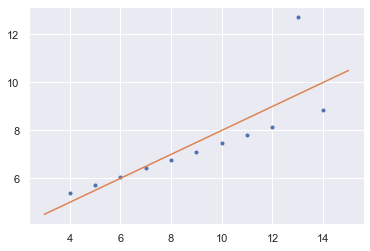

slope: 0.49990909090909064 intercept: 3.0017272727272735


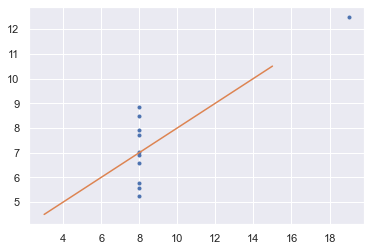

In [21]:
anscombe_x = [np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])]
anscombe_y = [np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82,  5.68]),
 np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
 np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15, 6.42,  5.73]),
 np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56, 7.91,  6.89])]

for x,y in zip(anscombe_x,anscombe_y):
    plt.plot(x,y, marker=".", linestyle="none")
    a, b = np.polyfit(x, y, 1)
    print("slope:",a,"intercept:",b)
    x_theor = np.array([3, 15])
    y_thoer = x_theor * a + b
    plt.plot(x_theor, y_theor)
    plt.show()

They all have the same slope and intercept.

